## **Import Libraries** 
___
Read in the required libraries.

In [1]:
# Analysis Libraries
import pandas as pd
import numpy as np

# Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 

#  Miscellaneous Libraries
import pickle 
import ast
from typing import Optional
import re

# Machine Learning and Statistics Libraries 
from scipy.stats import skew, kurtosis, normaltest
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler

## **Read Files** 
___
Read in the files that will be needed and set options for the visualization of dataframes.

In [2]:
# Read in all the properties
rosebank_df = pd.read_csv('Data/Rosebank_and_Parktown_real_estate.csv', index_col='Unnamed: 0')
fourways_df = pd.read_csv('Data/Fourways_Sunninghill_and_Lonehill_real_estate.csv', index_col='Unnamed: 0')
modderfontein_df = pd.read_csv('Data/Modderfontein_real_estate.csv', index_col='Unnamed: 0')

# Concatenate all the dataframes into one dataframe
df = pd.concat([rosebank_df, fourways_df, modderfontein_df], axis=0, ignore_index=True)

# Set dataframes to return all the features and not truncated.
pd.set_option('display.max_columns', None)

# Set the style of the plots
plt.style.use('ggplot')
# Set default colormap for continuous data (both Matplotlib and Seaborn)
plt.rcParams['image.cmap'] = 'Set2'
# Set default palette for categorical data
sns.set_palette('Set2')

## **Dataset Identification**
___
Identify the shape and size of the dataset along with its axes and datatypes for each feature to understand the overall structure of the dataset that has been read in. 

In [3]:
# Return the shape and size of the dataset
print(f'Shape of Dataset: {df.shape}\nSize of Dataset: {df.size}')

Shape of Dataset: (5541, 7)
Size of Dataset: 38787


In [4]:
# Return the axes of the dataset
df.axes

[RangeIndex(start=0, stop=5541, step=1),
 Index(['suburb', 'propert_desc', 'address', 'price', 'property_details',
        'property_features', 'image'],
       dtype='object')]

In [5]:
# Return the datatypes of each feature
df.dtypes

suburb               object
propert_desc         object
address              object
price                object
property_details     object
property_features    object
image                object
dtype: object

In [6]:
# Return the top 5 rows of the dataframe
df.head()

,suburb,propert_desc,address,price,property_details,property_features,image
0,Rosebank and Parktown,2 Bed Apartment in Craighall,"2 Ss Coconut Grove, 354 Jan Smuts Avenue",R 1 099 000,"['Listing number\nT4808440', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
1,Rosebank and Parktown,2 Bed Flat in Rosebank,"306 Roseways, 17 Tyrwhitt Avenue",R 2 175 000,"['Listing number\nT11656', 'Property type\nFla...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
2,Rosebank and Parktown,3 Bed House in Greenside East,58 Gleneagles Rd,R 2 950 000,"['Listing number\nT11616', 'Property type\nHou...","['Bedrooms\n3', 'Bathrooms\n3', 'En-suite\n2',...",https://helium.privateproperty.co.za/live-za-i...
3,Rosebank and Parktown,2 Bed Apartment in Gresswold,"10 Manhattan Place, 17 St Benedict",R 699 000,"['Listing number\nT4481649', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n2', 'Covered Parki...",https://helium.privateproperty.co.za/live-za-i...
4,Rosebank and Parktown,1 Bed Apartment in Rosebank,"1. The Hive, 39 Ashford Road",R 1 511 000,"['Listing number\nT4470228', 'Property type\nA...","['Bedrooms\n1', 'Bathrooms\n1']",https://helium.privateproperty.co.za/live-za-i...


In [7]:
# Return the bottom 5 rows of the dataset
df.tail()

,suburb,propert_desc,address,price,property_details,property_features,image
5536,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 300 000,"['Listing number\nT4786340', 'Property type\nA...","['Bedrooms\n3', 'Bathrooms\n2']",https://helium.privateproperty.co.za/live-za-i...
5537,Modderfontein,3 Bed Apartment in Greenstone Gate,NaN,R 1 349 900,"['Listing number\nT4794151', 'Property type\nA...","['Bedrooms\n3', 'Bathrooms\n2']",https://helium.privateproperty.co.za/live-za-i...
5538,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 450 000,"['Listing number\nT4482430', 'Property type\nA...","['Bedrooms\n3', 'Bathrooms\n2', 'En-suite\n1',...",https://helium.privateproperty.co.za/live-za-i...
5539,Modderfontein,3 Bed Townhouse in Modderfontein,NaN,R 1 650 000,"['Listing number\nT4484958', 'Property type\nT...","['Bedrooms\n3', 'Bathrooms\n2', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
5540,Modderfontein,1 Bed Apartment in Modderfontein,NaN,R 970 000,"['Listing number\nT4514266', 'Property type\nA...","['Bedrooms\n1', 'Bathrooms\n1']",https://helium.privateproperty.co.za/live-za-i...


## **Dataset Preprocessing**
___

### 1. **Dataset Cleaning**

The data cleaning process is an essential step during data preprocessing, as it helps ensure the quality and consistency of the dataset for analysis or model training

#### 1.1 **Miscellaneous Data Errors**

These errors can be generalized as the errors found in the data values of the records in the dataframe. This step includes converting features to correct datatypes.

##### 1.1.1 **Feature Data Type**

The features *property_details* and *property_features* are features which contain a list, where each element within the list contains two values seperated by a newline character (\n). The string found before the newline character represents the column name, and the string value after the newline character is the value. Therefore, these features need to be converted into a dataframe and appended into the dataframe.

In [8]:
df.head()

,suburb,propert_desc,address,price,property_details,property_features,image
0,Rosebank and Parktown,2 Bed Apartment in Craighall,"2 Ss Coconut Grove, 354 Jan Smuts Avenue",R 1 099 000,"['Listing number\nT4808440', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
1,Rosebank and Parktown,2 Bed Flat in Rosebank,"306 Roseways, 17 Tyrwhitt Avenue",R 2 175 000,"['Listing number\nT11656', 'Property type\nFla...","['Bedrooms\n2', 'Bathrooms\n1', 'Lounges\n1', ...",https://helium.privateproperty.co.za/live-za-i...
2,Rosebank and Parktown,3 Bed House in Greenside East,58 Gleneagles Rd,R 2 950 000,"['Listing number\nT11616', 'Property type\nHou...","['Bedrooms\n3', 'Bathrooms\n3', 'En-suite\n2',...",https://helium.privateproperty.co.za/live-za-i...
3,Rosebank and Parktown,2 Bed Apartment in Gresswold,"10 Manhattan Place, 17 St Benedict",R 699 000,"['Listing number\nT4481649', 'Property type\nA...","['Bedrooms\n2', 'Bathrooms\n2', 'Covered Parki...",https://helium.privateproperty.co.za/live-za-i...
4,Rosebank and Parktown,1 Bed Apartment in Rosebank,"1. The Hive, 39 Ashford Road",R 1 511 000,"['Listing number\nT4470228', 'Property type\nA...","['Bedrooms\n1', 'Bathrooms\n1']",https://helium.privateproperty.co.za/live-za-i...


In [9]:
def featureValueConvert(column: str, dataframe: Optional[pd.DataFrame]=df) -> pd.Series:
    """
    A function that converts the values of a feature from a string into python literal structures, 
    and in this case, into a list.
    
    Args:
        column:
            - Name of a feature that can be found in the pandas dataframe object passed in the
            dataframe parameter that has another python structure stored as a string value.
        dataframe:
            - A pandas dataframe object.

    Returns:
        conversion:
            A pandas series, with each value being a list

    """
    conversion = dataframe[column].apply(ast.literal_eval)

    return conversion


features_to_convert = ['property_details', 'property_features']
for feature in features_to_convert:
    df[feature] = featureValueConvert(feature)

In [10]:
def featureToDataframe(column: str, dataframe: Optional[pd.DataFrame]=df) -> pd.DataFrame:
    """
    Unpacks elements from a list within a specified DataFrame column into a new DataFrame.

    This function assumes that the elements of the specified column are lists of strings,
    where each string contains two parts separated by a newline character ('\\n'). The first
    part is treated as a key, and the second part as a value. These key-value pairs are 
    unpacked into a new DataFrame, where each dictionary created from the list becomes a row.
    
    Args:
        column:
            - The name of the column containing lists to unpack.
            
        dataframe:
            - The DataFrame that contains the column to be processed. Defaults to a pre-defined DataFrame (df).
    
    Returns:
        feature_dataframe:
            - A new DataFrame where each row corresponds to the unpacked dictionary of key-value pairs.
    """
    # Initialize an empty list to store the dictionaries unpacked from each list element
    unpacked_data = []
    
    # Loop over each row in the DataFrame
    for i in range(dataframe.shape[0]):
        data = {}

        # Loop through each element in the list for the current row
        for element in dataframe[column][i]:
            
            # Split the string by newline ('\n')
            li = element.split('\n')

            # Create a dictionary with the key-value pair
            dct = {li[0]: li[1]}
            data.update(dct)

        # Append the row's dictionary to the list of unpacked data
        unpacked_data.append(data)

    # Create a DataFrame from the list of dictionaries
    feature_dataframe = pd.DataFrame(unpacked_data)
    
    return feature_dataframe

# Create a copy of the dataframe
df2 = df.copy()

# Create dataframe from the two features with lists as values
property_details_df = featureToDataframe('property_details')
property_features_df = featureToDataframe('property_features')

# Concatenate all the dataframes
df2 = (
    pd.concat([df2.drop(columns=['property_details', 'property_features']),
               property_details_df, property_features_df], axis=1)
)

In [11]:
# Store the desired column order 
column_order = ['suburb', 'propert_desc', 'address', 'price', 'Listing number',
       'Property type', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies',
       'Bedrooms', 'Bathrooms', 'Lounges', 'Open Parkings', 'Dining Areas',
       'Garages', 'Storeys', 'En-suite', 'Covered Parkings', 'image']

# Reorder the dataframe columns
df2.reindex(columns=column_order)

,suburb,propert_desc,address,price,Listing number,Property type,Erf size,Floor size,Rates and taxes,Levies,Bedrooms,Bathrooms,Lounges,Open Parkings,Dining Areas,Garages,Storeys,En-suite,Covered Parkings,image
0,Rosebank and Parktown,2 Bed Apartment in Craighall,"2 Ss Coconut Grove, 354 Jan Smuts Avenue",R 1 099 000,T4808440,Apartment,4 418 m²,74 m²,R 761,R 2 102,2,1,1,2,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
1,Rosebank and Parktown,2 Bed Flat in Rosebank,"306 Roseways, 17 Tyrwhitt Avenue",R 2 175 000,T11656,Flat,NaN,116 m²,R 1 139,R 2 220,2,1,1,NaN,1,1,1,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
2,Rosebank and Parktown,3 Bed House in Greenside East,58 Gleneagles Rd,R 2 950 000,T11616,House,1 012 m²,NaN,R 2 242,NaN,3,3,1,3,2,2,1,2,NaN,https://helium.privateproperty.co.za/live-za-i...
3,Rosebank and Parktown,2 Bed Apartment in Gresswold,"10 Manhattan Place, 17 St Benedict",R 699 000,T4481649,Apartment,NaN,72 m²,R 386,R 1 900,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2,https://helium.privateproperty.co.za/live-za-i...
4,Rosebank and Parktown,1 Bed Apartment in Rosebank,"1. The Hive, 39 Ashford Road",R 1 511 000,T4470228,Apartment,NaN,36 m²,NaN,R 993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5536,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 300 000,T4786340,Apartment,NaN,103 m²,NaN,R 2 558,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
5537,Modderfontein,3 Bed Apartment in Greenstone Gate,NaN,R 1 349 900,T4794151,Apartment,NaN,101 m²,R 1 146,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://helium.privateproperty.co.za/live-za-i...
5538,Modderfontein,3 Bed Apartment in Modderfontein,NaN,R 1 450 000,T4482430,Apartment,75 m²,75 m²,R 600,R 1 774,3,2,1,1,NaN,NaN,NaN,1,2,https://helium.privateproperty.co.za/live-za-i...
5539,Modderfontein,3 Bed Townhouse in Modderfontein,NaN,R 1 650 000,T4484958,Townhouse,NaN,104 m²,R 1 028,R 2 615,3,2,1,NaN,NaN,NaN,NaN,NaN,2,https://helium.privateproperty.co.za/live-za-i...


##### 1.1.2 **Remove Measuring Unit From Values**

The features *price*, *Erf size*, *Floor size*, *Rates and taxes*, *Levies* are all features that have been identified as object features, however, these are numeric features that have their measuring unit in the data values. This needs to be corrected in order to be able to perform aggregate functions, and predictive regression modeling on the *price* feature. These measuring units need to be removed and added to the featuere name, and the feature be cast into a numeric feature. 

In [12]:
def alphaCharRemove(column: str, dataframe: pd.DataFrame) -> pd.Series:
    """
    Remove all non-numeric characters (letters, special characters) from a specified column in a DataFrame.

    Args:
        column:
            - The column name from which to remove non-numeric characters.
            dataframe (pd.DataFrame): The DataFrame that contains the specified column.

    Returns:
        new_feature: 
            - A new column (as a Series) with all non-numeric characters removed from the original values.
    """
    # Use regex to remove any non-numeric characters from the specified column
    new_feature = dataframe[column].replace(r'[\D$]', '', regex=True)

    return new_feature

In [13]:
def unitsCheck(column: str, dataframe: pd.DataFrame) -> None:
    """
    Identify and display all unique non-numeric characters (units) present in a specified column of a DataFrame.

    Args:
        column:
            - The column name from which to extract non-numeric characters (units).

        dataframe:
            - The DataFrame that contains the specified column.

    Returns:
        None:
            - This function prints the column name and the unique non-numeric units found.
    """
    # Use regex to remove all digits and spaces, leaving only non-numeric characters (units)
    units = dataframe[column].replace(r'[\d\s]', '', regex=True).unique()
    print(f'Feature: {column}\nUnits: {units}\n')

In [14]:
# Store the subset of object features to be converted into numeric features
to_numeric_features_df = df2.loc[:, ['price', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies']]

for feature in to_numeric_features_df:
    # Reaturn the measuring units for the features
    unitsCheck(feature, df2)

Feature: price
Units: ['R' 'OnAuction' 'POA']

Feature: Erf size
Units: ['m²' nan '.ha' 'ha']

Feature: Floor size
Units: ['m²' nan '.m²']

Feature: Rates and taxes
Units: ['R' nan]

Feature: Levies
Units: ['R' nan]



In [15]:
# Return total number of properties in the dataframe that are POA or Auction for price.
poa_auction_records = df2[df2['price'].isin(['On Auction', 'POA'])].index
print(f'Total properties that need POA (Price on Appointment) or Auction: {len(poa_auction_records)}')

Total properties that need POA (Price on Appointment) or Auction: 13


In [16]:
# Create a copy of the current dataframe
df3 = df2.copy()

# Remove the 11 records with POA or Auction in the price feature
df3 = df3.drop(index=poa_auction_records).reset_index(drop=True)

In [17]:
# Confirm that records with POA and OnAuction for price, have been removed.
for feature in to_numeric_features_df:
    # Reaturn the measuring units for the features
    unitsCheck(feature, df3) 

Feature: price
Units: ['R']

Feature: Erf size
Units: ['m²' nan '.ha' 'ha']

Feature: Floor size
Units: ['m²' nan '.m²']

Feature: Rates and taxes
Units: ['R' nan]

Feature: Levies
Units: ['R' nan]



In [18]:
# Change the feature name to include the measuring unit
units = to_numeric_features_df.replace('[\\d\\s,.]', '', regex=True).mode().values.flatten()
feature_with_units = [f'{value}_({units[i]})' for i, value in enumerate(to_numeric_features_df.columns)]
feature_with_units

['price_(R)',
 'Erf size_(m²)',
 'Floor size_(m²)',
 'Rates and taxes_(R)',
 'Levies_(R)']

Even though the Erf size feature has values in hectors as well, we will not take this into consideration because we intend on dropping this feature. 

In [19]:
# Rename the features in df3
df3.rename(columns=dict(zip(to_numeric_features_df.columns, feature_with_units)), inplace=True)
# Replace the white space between words with an underscore
df3.rename(columns=dict(zip(df3.columns, [col.replace(' ', '_') for col in df3.columns])), inplace=True)
df3.head()

,suburb,propert_desc,address,price_(R),image,Listing_number,Property_type,Erf_size_(m²),Floor_size_(m²),Rates_and_taxes_(R),Levies_(R),Bedrooms,Bathrooms,Lounges,Open_Parkings,Dining_Areas,Garages,Storeys,En-suite,Covered_Parkings
0,Rosebank and Parktown,2 Bed Apartment in Craighall,"2 Ss Coconut Grove, 354 Jan Smuts Avenue",R 1 099 000,https://helium.privateproperty.co.za/live-za-i...,T4808440,Apartment,4 418 m²,74 m²,R 761,R 2 102,2,1,1,2,NaN,NaN,NaN,NaN,NaN
1,Rosebank and Parktown,2 Bed Flat in Rosebank,"306 Roseways, 17 Tyrwhitt Avenue",R 2 175 000,https://helium.privateproperty.co.za/live-za-i...,T11656,Flat,NaN,116 m²,R 1 139,R 2 220,2,1,1,NaN,1,1,1,NaN,NaN
2,Rosebank and Parktown,3 Bed House in Greenside East,58 Gleneagles Rd,R 2 950 000,https://helium.privateproperty.co.za/live-za-i...,T11616,House,1 012 m²,NaN,R 2 242,NaN,3,3,1,3,2,2,1,2,NaN
3,Rosebank and Parktown,2 Bed Apartment in Gresswold,"10 Manhattan Place, 17 St Benedict",R 699 000,https://helium.privateproperty.co.za/live-za-i...,T4481649,Apartment,NaN,72 m²,R 386,R 1 900,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2
4,Rosebank and Parktown,1 Bed Apartment in Rosebank,"1. The Hive, 39 Ashford Road",R 1 511 000,https://helium.privateproperty.co.za/live-za-i...,T4470228,Apartment,NaN,36 m²,NaN,R 993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
for feature in df3.loc[:, ['price_(R)', 'Erf_size_(m²)', 'Floor_size_(m²)', 'Rates_and_taxes_(R)', 'Levies_(R)']]:
    # Remove the measuring units from the values 
    df3[feature] = alphaCharRemove(feature, df3)

In [21]:
# Drop the records that were originally 'OnAuction' or 'POA' in the price feature that were replaced
# with empty string value, ''.
df3 = df3.drop(index=df3[df3['price_(R)'] == ''].index).reset_index(drop=True)

In [22]:
# Convert the features to float values
df3 = df3.astype({
    'price_(R)': float,
    'Erf_size_(m²)': float,
    'Floor_size_(m²)': float,
    'Rates_and_taxes_(R)': float,
    'Levies_(R)': float
})

In [23]:
# Check the data types of the features
df3.dtypes

suburb                  object
propert_desc            object
address                 object
price_(R)              float64
image                   object
Listing_number          object
Property_type           object
Erf_size_(m²)          float64
Floor_size_(m²)        float64
Rates_and_taxes_(R)    float64
Levies_(R)             float64
Bedrooms                object
Bathrooms               object
Lounges                 object
Open_Parkings           object
Dining_Areas            object
Garages                 object
Storeys                 object
En-suite                object
Covered_Parkings        object
dtype: object

##### 1.1.3 **Cast Bedrooms, Bathrooms and Lounges features into Float**

These features are a count of the total number of bedrooms, bathrooms and lounges for each record, representing a single property. These Values are numeric in nature, and therefore can be aggregegated if required. However, the current data type of these two features is object, and therefore the features need to be cast to a float or integer data type to have access the numeric methods. 

In [24]:
# Check the values of the Bedrooms feature
df3['Bedrooms'].value_counts().sort_index(ascending=True)

Bedrooms
0        20
0.5      28
1       955
1.5       5
10        5
11        2
12        4
125       1
16        3
2      1878
2.5       8
23        1
3      1692
3.5       1
4       619
48        1
5       165
54        1
6        42
7        16
7.5       1
8         6
9         1
Name: count, dtype: int64

In [25]:
# We are only looking at properties with at least 1 bedroom. Remove records with no Bedrooms.
df3 = df3.drop(index=df3[df3['Bedrooms'] == '0'].index).reset_index(drop=True)

# Confirm that the records with 0 have been removed
df3['Bedrooms'].value_counts().sort_index(ascending=True)

Bedrooms
0.5      28
1       955
1.5       5
10        5
11        2
12        4
125       1
16        3
2      1878
2.5       8
23        1
3      1692
3.5       1
4       619
48        1
5       165
54        1
6        42
7        16
7.5       1
8         6
9         1
Name: count, dtype: int64

In [26]:
# Cast the bedrooms, bathrooms and lounges features into float values. 
df3 = df3.astype(
    {'Bedrooms': float,
     'Bathrooms': float,
     'Lounges': float}
)

### 2. **Duplicated values**

In the context of a dataframe, a record can be a duplicate of another record, if all the data values of each feature are identical. A record can also be considered a duplicate if the data values of a specified subset of features are identical. In this section, we look to identify and remove the duplicate values within the dataset.

In [ ]:
# Return the total number of duplicated values in the dataset
dupes = df3.duplicated().sum()
print(f'Total number of duplicate values in the dataframe: {dupes}')

Total number of duplicate values in the dataframe: 4


In [28]:
# Return a subset of the duplicated values
df3[df3.duplicated()]

,suburb,propert_desc,address,price_(R),image,Listing_number,Property_type,Erf_size_(m²),Floor_size_(m²),Rates_and_taxes_(R),Levies_(R),Bedrooms,Bathrooms,Lounges,Open_Parkings,Dining_Areas,Garages,Storeys,En-suite,Covered_Parkings
1888,Rosebank and Parktown,3 Bed House in Orchards,NaN,2999000.0,https://helium.privateproperty.co.za/live-za-i...,T3618699,House,1487.0,NaN,NaN,NaN,3.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,5
2028,Rosebank and Parktown,2 Bed Apartment in Melrose Arch,NaN,4950000.0,https://helium.privateproperty.co.za/live-za-i...,T3434581,Apartment,NaN,151.0,NaN,NaN,2.0,2.5,1.0,NaN,1,2,NaN,NaN,NaN
4366,"Fourways, Sunninghill and Lonehill",1 Bed Apartment in Craigavon,NaN,790000.0,https://helium.privateproperty.co.za/live-za-i...,T4764621,Apartment,NaN,77.0,358.0,2559.0,1.0,1.5,1.0,NaN,1,NaN,NaN,NaN,1
4703,"Fourways, Sunninghill and Lonehill",2 Bed Apartment in Sunninghill,NaN,995000.0,https://helium.privateproperty.co.za/live-za-i...,T4779647,Apartment,NaN,98.0,815.0,2046.0,2.0,1.0,1.0,NaN,1,NaN,2,NaN,2


In [29]:
# Store a copy of the current dataframe
df4 = df3.copy()

# Drop the duplicate values annd keep the first instance
df4.drop_duplicates(keep='first', ignore_index=True, inplace=True)

### 3. **Null Values**

Null values are missing data values within a feature of record. These missing values need to be identified and either removed or imputed. 

In [30]:
# Identify the total number of null values
nulls = np.count_nonzero(df4.isnull().values)
print(f'Total number of null values in the dataframe: {nulls}')

Total number of null values in the dataframe: 34189


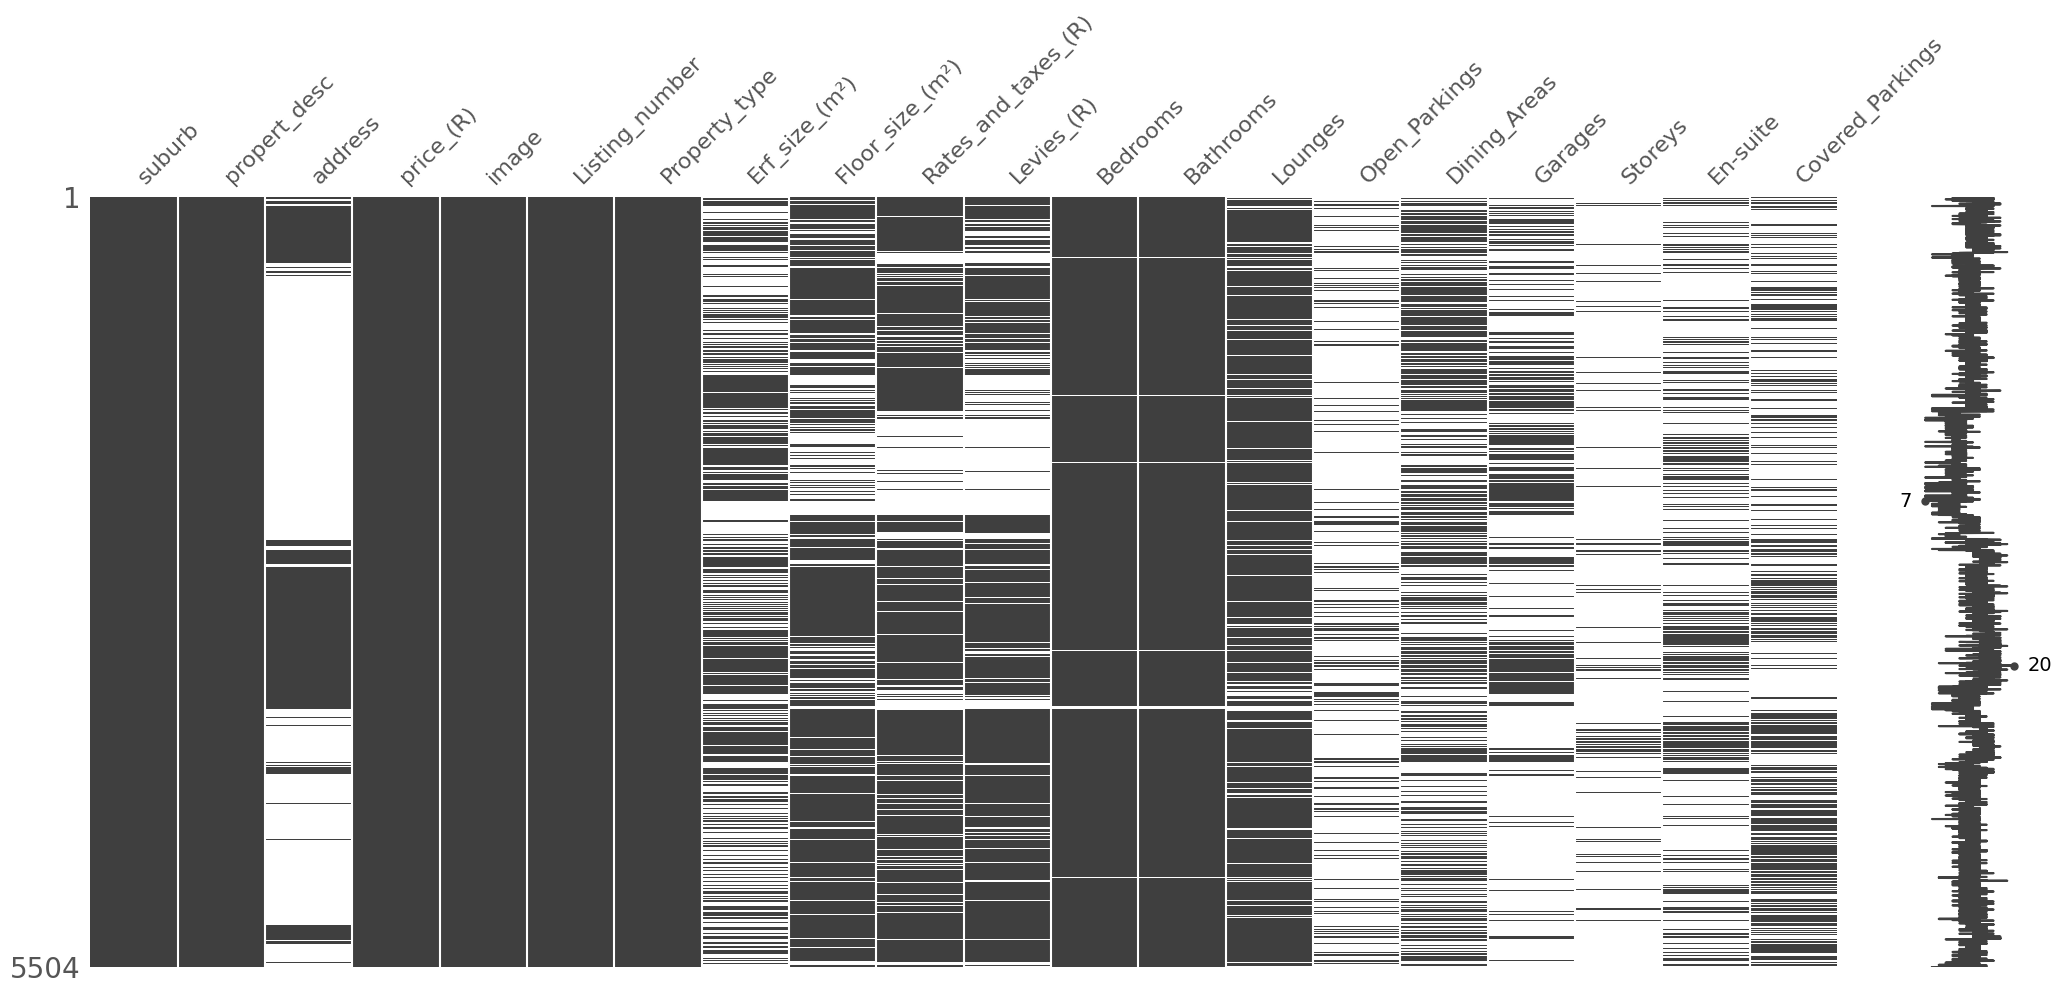

In [31]:
# Visualize the null values in the dataframe
msno.matrix(df4)
plt.show()

In [32]:
# Return the total number of null values per feature
df4.isnull().sum() / df4.shape[0] * 100

suburb                  0.000000
propert_desc            0.000000
address                66.279070
price_(R)               0.000000
image                   0.000000
Listing_number          0.000000
Property_type           0.000000
Erf_size_(m²)          46.602471
Floor_size_(m²)        22.747093
Rates_and_taxes_(R)    24.073401
Levies_(R)             31.068314
Bedrooms                1.326308
Bathrooms               1.326308
Lounges                12.100291
Open_Parkings          83.339390
Dining_Areas           43.241279
Garages                65.098110
Storeys                92.223837
En-suite               70.421512
Covered_Parkings       61.319041
dtype: float64

In [33]:
# Create a copy of the current dataframe
df5 = df4.copy()

# Drop features that have null values greater than 13, excluding floor size. 
df5.drop(columns=['address', 'Erf_size_(m²)', 'Rates_and_taxes_(R)', 'Levies_(R)','Open_Parkings',
                  'Dining_Areas', 'Garages', 'Storeys', 'En-suite', 'Covered_Parkings'], inplace=True)

In [34]:
# Return the total number of null values per feature after dropping features
df5.isnull().sum()

suburb                0
propert_desc          0
price_(R)             0
image                 0
Listing_number        0
Property_type         0
Floor_size_(m²)    1252
Bedrooms             73
Bathrooms            73
Lounges             666
dtype: int64

##### 3.1 **Bedroom Nulls**

These are the records with null values within the Bedrooms feature. 

In [35]:
# View features with null values for bedrooms
bedrooms_null_df = df5[df5['Bedrooms'].isnull().values]
bedrooms_null_df

,suburb,propert_desc,price_(R),image,Listing_number,Property_type,Floor_size_(m²),Bedrooms,Bathrooms,Lounges
64,Rosebank and Parktown,5 245 m² Land available in Waverley,3350000.0,https://helium.privateproperty.co.za/live-za-i...,T4507606,Residential Land,5245.0,NaN,NaN,NaN
409,Rosebank and Parktown,1 020 m² Land available in Orchards,1200000.0,https://helium.privateproperty.co.za/live-za-i...,T4279516,Residential Land,NaN,NaN,NaN,NaN
432,Rosebank and Parktown,907 m² Land available in Craighall,2300000.0,https://helium.privateproperty.co.za/live-za-i...,T4464189,Residential Land,NaN,NaN,NaN,NaN
1414,Rosebank and Parktown,3 504 m² Land available in Craighall,7300000.0,https://helium.privateproperty.co.za/live-za-i...,T4140645,Residential Land,NaN,NaN,NaN,NaN
1418,Rosebank and Parktown,2 681 m² Land available in Dunkeld,7495000.0,https://helium.privateproperty.co.za/live-za-i...,T4802439,Residential Land,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4860,"Fourways, Sunninghill and Lonehill",418 m² Land available in Fourways,1150000.0,https://helium.privateproperty.co.za/live-za-i...,T4773995,Residential Land,NaN,NaN,NaN,NaN
4864,"Fourways, Sunninghill and Lonehill",414 m² Land available in Fourways,1150000.0,https://helium.privateproperty.co.za/live-za-i...,T4717832,Residential Land,NaN,NaN,NaN,NaN
4866,"Fourways, Sunninghill and Lonehill",418 m² Land available in Fourways,1150000.0,https://helium.privateproperty.co.za/live-za-i...,T4671311,Residential Land,NaN,NaN,NaN,NaN
5158,"Fourways, Sunninghill and Lonehill",915 m² Land available in Cedar Creek,1400000.0,https://helium.privateproperty.co.za/live-za-i...,T4732177,Residential Land,NaN,NaN,NaN,NaN


In [36]:
# Return the unique property type for the bedrooms null df
bedrooms_null_df['Property_type'].unique()

array(['Residential Land'], dtype=object)

In [37]:
# search for the substring 'land' in the property_desc feature, were land is in the substring,
# return 1, and if not, return 0. Find the sum to find the total number of records with 'land' in the subset
total_land = bedrooms_null_df['propert_desc'].str.count(pat='land', flags=re.IGNORECASE).sum()

# Compare the total number of records with land, and the total records of the berooms_null_df
if total_land == bedrooms_null_df.shape[0]:
    print('All the records are land properties, and not building properties.')
else:
    print('Not all the properties are land properties.')

All the records are land properties, and not building properties.


In [38]:
# Create a copy of the current dataframe
df6 = df5.copy()

# drop the null values in the bedroom feature
df6.dropna(subset='Bedrooms', ignore_index=True, inplace=True)

# Confirm that 74 records have been removed from the previous dataframe to the current dataframe
print(f'{df5.shape[0] - df6.shape[0]} Records have been removed from the current dataframe.')

73 Records have been removed from the current dataframe.


##### 3.2 **Floor Size Nulls**

This section identifies the records with null values in the floo size feature.

In [39]:
# Make a copy of the current dataframe
df7 =df6.copy()

# Instantiate the KNNimputer
imputer = KNNImputer()

# Impute null values for floor size and for lounges
df7['Floor_size_(m²)'] = imputer.fit_transform(df7[['Floor_size_(m²)']])
df7['Lounges'] = imputer.fit_transform(df7[['Lounges']])

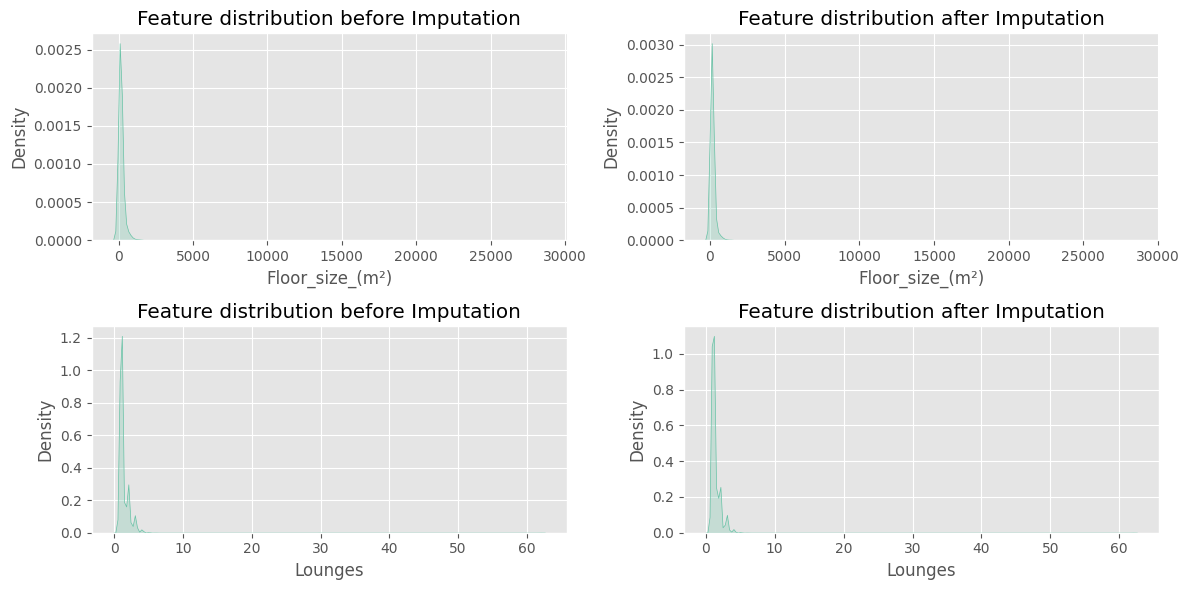

In [40]:
# Check that the imputation did not drastically change the distribution of the features
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.kdeplot(df6['Floor_size_(m²)'], fill=True)
plt.title('Feature distribution before Imputation')

plt.subplot(2, 2, 2)
sns.kdeplot(df7['Floor_size_(m²)'], fill=True)
plt.title('Feature distribution after Imputation')

plt.subplot(2, 2, 3)
sns.kdeplot(df6['Lounges'], fill=True)
plt.title('Feature distribution before Imputation')

plt.subplot(2, 2, 4)
sns.kdeplot(df7['Lounges'], fill=True)
plt.title('Feature distribution after Imputation')

plt.tight_layout()
plt.show()

In [41]:
df7.isnull().sum()

suburb             0
propert_desc       0
price_(R)          0
image              0
Listing_number     0
Property_type      0
Floor_size_(m²)    0
Bedrooms           0
Bathrooms          0
Lounges            0
dtype: int64

### 4. **Feature Selection**

This section involves removing unnecessary Features. These features tend to include features for identification such as ID columns.

In [42]:
# return the total number of unique values per feature
df7.apply(lambda x: x.nunique())

suburb                3
propert_desc        637
price_(R)           963
image              5431
Listing_number     5431
Property_type        12
Floor_size_(m²)     470
Bedrooms             22
Bathrooms            27
Lounges              11
dtype: int64

In [43]:
# Create a copy of the current dataframe
df8 = df7.copy()

# Remove the Listing number and the image features
df8 = df7.drop(columns=['Listing_number', 'image', 'propert_desc']).reset_index(drop=True)

In [44]:
# Round the values of Lounges feature that are greater than 1 to 1 decimal place, else, return the 
# original value of x (This is for lounges that are 0.5, like a bachelor apartment)
df8['Lounges'] = df8['Lounges'].apply(lambda x: round(x, 1) if x > 1 else x)

### 5. **One Hot Encoding**

A technique used to convert categorical variables into a numerical format that machine learning algorithms can understand. It transforms each category of a categorical feature into a new binary (0 or 1) column.

In [45]:
df8.head()

,suburb,price_(R),Property_type,Floor_size_(m²),Bedrooms,Bathrooms,Lounges
0,Rosebank and Parktown,1099000.0,Apartment,74.000000,2.0,1.0,1.0
1,Rosebank and Parktown,2175000.0,Flat,116.000000,2.0,1.0,1.0
2,Rosebank and Parktown,2950000.0,House,188.116914,3.0,3.0,1.0
3,Rosebank and Parktown,699000.0,Apartment,72.000000,2.0,2.0,1.3
4,Rosebank and Parktown,1511000.0,Apartment,36.000000,1.0,1.0,1.3


In [46]:
# Crearte a copy of the current dataframe
df9 = df8.copy()

# Apply one hot encoding
df9 = pd.get_dummies(df9, columns=['Property_type', 'suburb'], drop_first=True, dtype=int)

### 7. **Outliers**

An outlier is a data point that differs significantly from other observations in a dataset. Outliers can occur due to variability in the data or errors in measurement, and they can influence the results of statistical analyses and machine learning models.

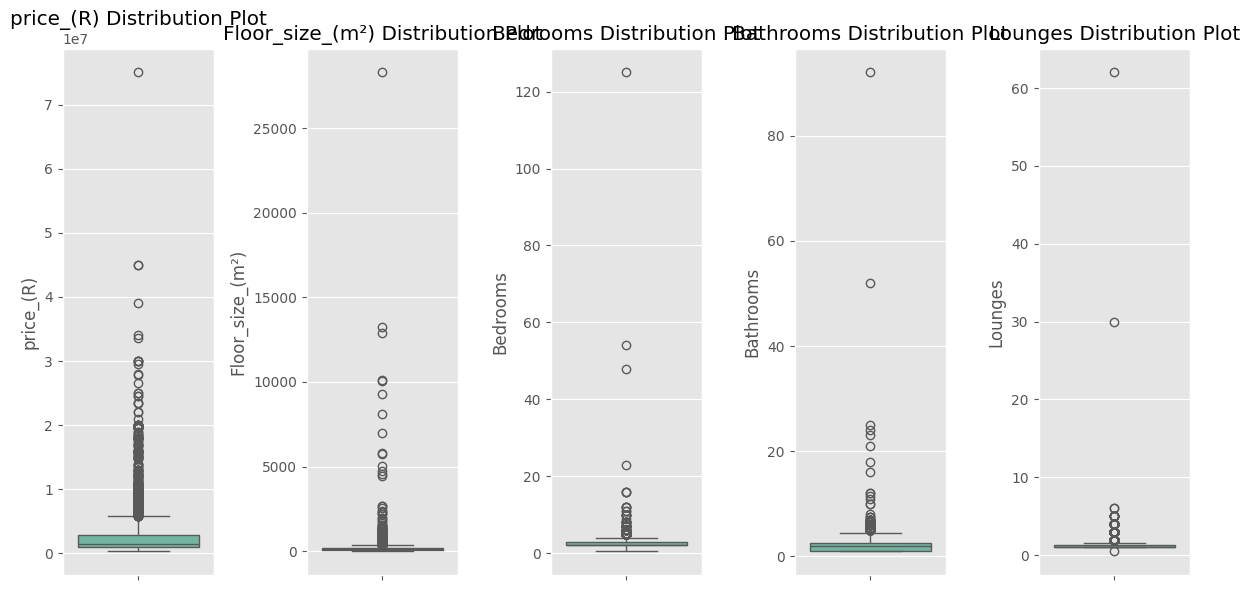

In [47]:
plt.figure(figsize=(12, 6))

for i, feature in enumerate(df9.iloc[:, 0:5].columns):
    plt.subplot(1, 5,  1+i)
    sns.boxplot(df9[feature])
    plt.title(f'{feature} Distribution Plot')

plt.tight_layout()
plt.show()

In [48]:
def outlierIQR(dataframe: pd.DataFrame, column: str):
    # Find the first and third quantile values from the feature of the dataframe
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)

    # Store the IQR value
    IQR = q3 - q1 

    # Store the upper and lower wick limits 
    upper_limit = dataframe[column] > q3 + (IQR * 3)
    lower_limit = dataframe[column] < q1 - (IQR * 3)   

    # Store the outliers 
    outliers = dataframe[column][upper_limit | lower_limit].index.to_list()

    return outliers

outlier_records = []
for element in df9.iloc[:, 0:4]:
    outliers = outlierIQR(column=element, dataframe=df9)
    outlier_records.append(outliers)
    
# Flatten the nested list of index values
outlier_records = [element for sublist in outlier_records for element in sublist]

In [49]:
# Store an outlier df
outlier_df = df9.loc[outlier_records, :]
outlier_df.head()

,price_(R),Floor_size_(m²),Bedrooms,Bathrooms,Lounges,Property_type_Bachelor,Property_type_Cluster,Property_type_Duplex,Property_type_Flat,Property_type_House,Property_type_Loft,Property_type_Penthouse,Property_type_Simplex,Property_type_Small Holding,Property_type_Studio,Property_type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
14,11990000.0,223.000000,4.0,2.5,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1
23,25000000.0,188.116914,5.0,4.5,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1
29,8900000.0,631.000000,6.0,6.5,5.0,0,0,0,0,1,0,0,0,0,0,0,0,1
45,12250000.0,307.000000,4.0,4.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1
46,18000000.0,396.000000,3.0,3.0,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [50]:
# Store a dataframe with no outliers
non_outlier_df = df9[~df9.index.isin(outlier_records)]
non_outlier_df.head()

,price_(R),Floor_size_(m²),Bedrooms,Bathrooms,Lounges,Property_type_Bachelor,Property_type_Cluster,Property_type_Duplex,Property_type_Flat,Property_type_House,Property_type_Loft,Property_type_Penthouse,Property_type_Simplex,Property_type_Small Holding,Property_type_Studio,Property_type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
0,1099000.0,74.000000,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2175000.0,116.000000,2.0,1.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,2950000.0,188.116914,3.0,3.0,1.0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,699000.0,72.000000,2.0,2.0,1.3,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1511000.0,36.000000,1.0,1.0,1.3,0,0,0,0,0,0,0,0,0,0,0,0,1


In [51]:
non_outlier_df.tail()

,price_(R),Floor_size_(m²),Bedrooms,Bathrooms,Lounges,Property_type_Bachelor,Property_type_Cluster,Property_type_Duplex,Property_type_Flat,Property_type_House,Property_type_Loft,Property_type_Penthouse,Property_type_Simplex,Property_type_Small Holding,Property_type_Studio,Property_type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
5426,1300000.0,103.000000,3.0,2.0,1.3,0,0,0,0,0,0,0,0,0,0,0,1,0
5427,1349900.0,101.000000,3.0,2.0,1.3,0,0,0,0,0,0,0,0,0,0,0,1,0
5428,1450000.0,75.000000,3.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0
5429,1650000.0,104.000000,3.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,1,1,0
5430,970000.0,188.116914,1.0,1.0,1.3,0,0,0,0,0,0,0,0,0,0,0,1,0


### 8. **Feature Scaling**

Feature scaling is the process of transforming the values of numerical features in a dataset so that they share a common scale, without distorting differences in the ranges of values. This ensures that no single feature disproportionately influences a machine learning model, particularly for models sensitive to the magnitude of input features.

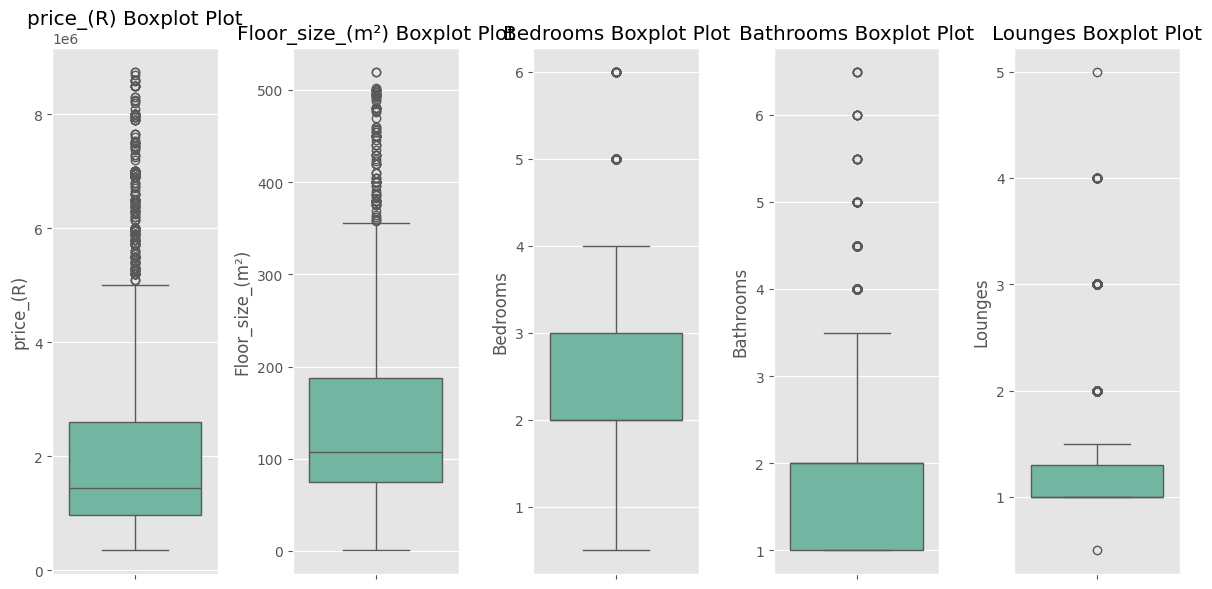

In [52]:
plt.figure(figsize=(12, 6))

for i, feature in enumerate(non_outlier_df.iloc[:, 0:5].columns):
    plt.subplot(1, 5,  1+i)
    sns.boxplot(non_outlier_df[feature])
    plt.title(f'{feature} Boxplot Plot')

plt.tight_layout()
plt.show()

In [53]:
def statistics(dataframe: pd.DataFrame) -> None:
    """
    A function that outputs statistics for features with more than 12 unique values.
    The skew and Kurtosis values, along with the p-value from the Normal Test. 
    These values help evaluate the distribution of the features of the dataframe passed in to 
    the dataframe parameter. 

    Args: pandas.dataframe.
        - A pandas dataframe object.

    Returns: 
        None
    """
    for column in dataframe:
        _skew = skew(dataframe[column])
        _kurtosis = kurtosis(dataframe[column], fisher=True)
        print(
            f"\n{column}\n"
            f"skew: {_skew:.4f}\n"
            f"kurtosis: {_kurtosis:.4f}"
        )

        # Perform Shapiro-Wilk test
        stat, p_value = normaltest(dataframe[column])

        # Print the results
        print(f"Normal Test: {stat:.4f}")
        print(f"P-value: {p_value:.4f}")

        # Interpret the p-value
        alpha = 0.05
        if p_value > alpha:
            print("The data is likely normally distributed (fail to reject H0).")
        else:
            print("The data is not normally distributed (reject H0).")

        # Check the absolute values of each skew value of a feature
        if np.abs(_skew) < 0.5:
            print('distribution is almost symmetrical')
        elif 0.5 <= np.abs(_skew) <= 1:
            print('distribution is modertely skewed')
        else:
            print('distribution is highly skewed')
        
        # Extremity of tail distribution
        if _kurtosis > 0:
            print(
                f'Leptokurtic distribution - heavier tails and a sharper peak than the '
                f'normal distribution.\n'
                f'This type of distribution is often associated with higher peakedness '
                f'and a greater probability of extreme values.\n'
            )
        elif _kurtosis < 0:
            print(
                f'Platykurtic distribution - lighter tails and a flatter peak than the '
                f'normal distribution.\n'
                f'This type of distribution is often associated with less peakedness ' 
                f'and a lower probability of extreme values.\n'
            )
        else:
            print(
                f'Mesokurtic distribution - similar peak and tail shape as the normal '
                f'distribution.\n'
                )
                

statistics(non_outlier_df.iloc[:, 0:5])


price_(R)
skew: 1.8141
kurtosis: 3.4640
Normal Test: 1748.0871
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This type of distribution is often associated with higher peakedness and a greater probability of extreme values.


Floor_size_(m²)
skew: 1.5855
kurtosis: 3.6099
Normal Test: 1561.1392
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is highly skewed
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This type of distribution is often associated with higher peakedness and a greater probability of extreme values.


Bedrooms
skew: 0.4199
kurtosis: 0.1167
Normal Test: 140.1889
P-value: 0.0000
The data is not normally distributed (reject H0).
distribution is almost symmetrical
Leptokurtic distribution - heavier tails and a sharper peak than the normal distribution.
This type o

`NOTES`:

- Judging from the Distribution of the features price, floor space, bedrooms and bathrooms, we can see the bedroom and the bathroom features are made up of discrete values with a small range of values. With the floor size and features, we can see that the features look highly skewed, and the shape of the distribution suggests a log transformation before scaling the feature. 

| Feature | Skew | Null Hypothesis | Distribution Type | Transformation | Scale Method |
| ------- | ---- | --------------- | ----------------- | -------------- | ------------ |
| Price | Highly Skewed | Rejected | Leptokurtic | Yes | RobustScaler |
| Floor Size | Highly Skewed | Rejected | Leptokurtic | Yes | RobustScaler |
| Bedrooms | +ve skew | Rejected | Leptokurtic | No | RobustScaler |
| Bathrooms | Highly Skewed | Rejected | Leptokurtic | Yes | RobustScaler |
| Lounges | Highly Skewed | Rejected | Leptokurtic | Yes | RobustScaler |

- Due to the other features being one hot encoded features, we will apply MinMaxScaler to scale the features. 


In [54]:
non_outlier_df.tail()

,price_(R),Floor_size_(m²),Bedrooms,Bathrooms,Lounges,Property_type_Bachelor,Property_type_Cluster,Property_type_Duplex,Property_type_Flat,Property_type_House,Property_type_Loft,Property_type_Penthouse,Property_type_Simplex,Property_type_Small Holding,Property_type_Studio,Property_type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
5426,1300000.0,103.000000,3.0,2.0,1.3,0,0,0,0,0,0,0,0,0,0,0,1,0
5427,1349900.0,101.000000,3.0,2.0,1.3,0,0,0,0,0,0,0,0,0,0,0,1,0
5428,1450000.0,75.000000,3.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,0,1,0
5429,1650000.0,104.000000,3.0,2.0,1.0,0,0,0,0,0,0,0,0,0,0,1,1,0
5430,970000.0,188.116914,1.0,1.0,1.3,0,0,0,0,0,0,0,0,0,0,0,1,0


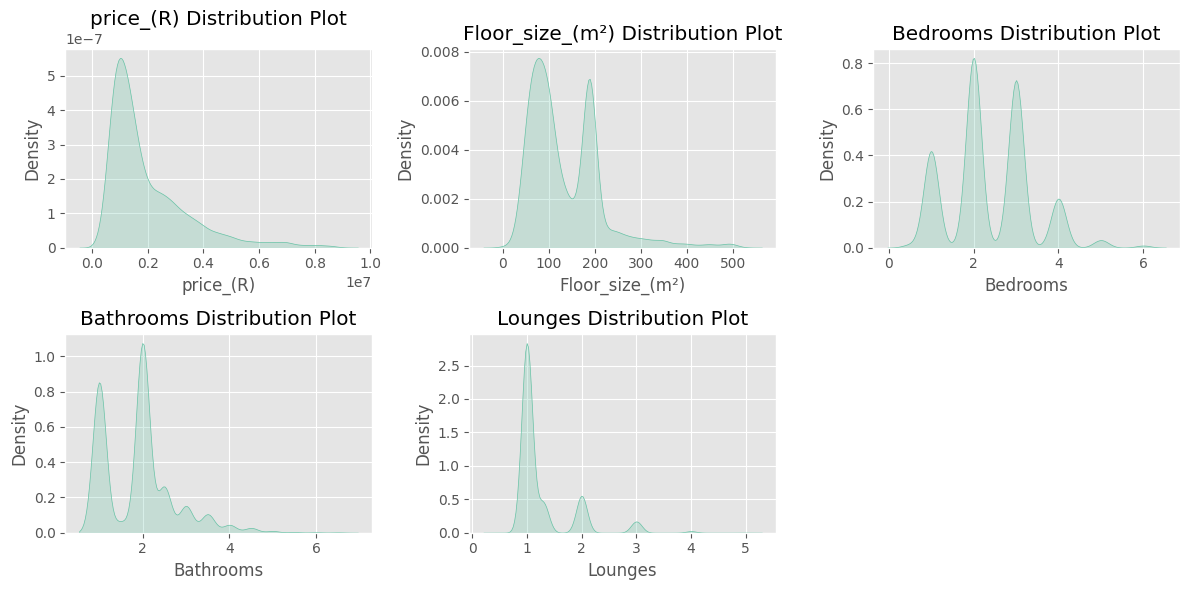

In [55]:
# Visualize the distribution before transformation and scaling
plt.figure(figsize=(12, 6))

for i, feature in enumerate(non_outlier_df.iloc[:, 0:5].columns):
    plt.subplot(2, 3, 1+i)
    sns.kdeplot(non_outlier_df[feature], fill=True)
    plt.title(f'{feature} Distribution Plot')

plt.tight_layout()
plt.show()

In [56]:
def featureScaling(dataframe: pd.DataFrame, column: str) -> np.ndarray:
    """
    This function applies appropriate feature scaling techniques to a column of a DataFrame.
    It performs a log transformation followed by robust scaling for highly skewed features
    like 'Floor size' and 'price'. Other numerical features like 'Bedrooms' and 'Bathrooms'
    are scaled using robust scaling. For other features, MinMaxScaler is used.

    Parameters:
        dataframe: 
            - The DataFrame containing the data.
        column: 
            - The name of the feature to scale.

    Returns:
        new_feature:
            - The scaled feature values.
    """

    if column in ['Floor_size_(m²)', 'price_(R)', 'Bathrooms', 'Lounges']:
        # Transform the highly skewed feature using log transformation
        log_transform = np.log1p(dataframe[[column]])

        # Instantiate the RobustScaler
        scaler = RobustScaler()

        # Fit and transform the data of the feature
        new_feature = scaler.fit_transform(log_transform) 

        if column == 'price_(R)':
            # Store the robust scaler that scaled and transforemd the price feature
            with open('API/price_robust_scaler.pkl', 'wb') as file:
                pickle.dump(scaler, file)
        
        # Output confirmation of the feature that has been scaled using transformation and scale
        print(f'{column} has been transformed using log transformation and scaled using Robust Scaler.\n')

        return new_feature
    
    if column == 'Bedrooms':
        # Instantiate the RobustScaler
        scaler = RobustScaler()

        # Fit and transform the data of the feature
        new_feature = scaler.fit_transform(dataframe[[column]])

        # Output confirmation of the feature that has been scaled using transformation and scale
        print(f'{column} has been scaled using Robust Scaler.\n')

        return new_feature

    else:
        if dataframe[column].nunique() > 2:
            # Instantiate the MinMaxScaler
            scaler = MinMaxScaler()

            # Fit and transform the data of the feature
            new_feature = scaler.fit_transform(dataframe[[column]])

            # Output confirmation of the feature that has been scaled using transformation and scale
            print(f'{column} has been scaled using Normalization.\n')

            return new_feature
        
        else:
            # Convert pandas series into a numpay array
            return dataframe[column].to_numpy()


# Set a blank dictionary to store each scaled feature 
table_data = {}

# Iterate through all the columns of the dataframe, non_outlier_df
for column in non_outlier_df:

    # Apply the feature transformation and store as a variable
    scaled_feature = featureScaling(dataframe=non_outlier_df, column=column)

    # Store a dictionary of the feature name from the dataframe as the key, and the scaled data  
    # as the value.
    data = {column: scaled_feature.flatten()}

    # Add the dictionary to the table_data list.
    table_data.update(data)


# Convert the list of dictionaries into a dataframe 
scaled_df = pd.DataFrame(table_data)
# Stored the scaled dataframe for predictive modeling
scaled_df.to_csv('Data/modeling_df.csv', index=False)

scaled_df.head()

price_(R) has been transformed using log transformation and scaled using Robust Scaler.

Floor_size_(m²) has been transformed using log transformation and scaled using Robust Scaler.

Bedrooms has been scaled using Robust Scaler.

Bathrooms has been transformed using log transformation and scaled using Robust Scaler.

Lounges has been transformed using log transformation and scaled using Robust Scaler.



,price_(R),Floor_size_(m²),Bedrooms,Bathrooms,Lounges,Property_type_Bachelor,Property_type_Cluster,Property_type_Duplex,Property_type_Flat,Property_type_House,Property_type_Loft,Property_type_Penthouse,Property_type_Simplex,Property_type_Small Holding,Property_type_Studio,Property_type_Townhouse,suburb_Modderfontein,suburb_Rosebank and Parktown
0,-0.268264,-0.399989,0.0,-1.000000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.418202,0.087802,0.0,-1.000000,0.0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,0.724693,0.614540,1.0,0.709511,0.0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,-0.723314,-0.429638,0.0,0.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.051897,-1.175050,-1.0,-1.000000,1.0,0,0,0,0,0,0,0,0,0,0,0,0,1


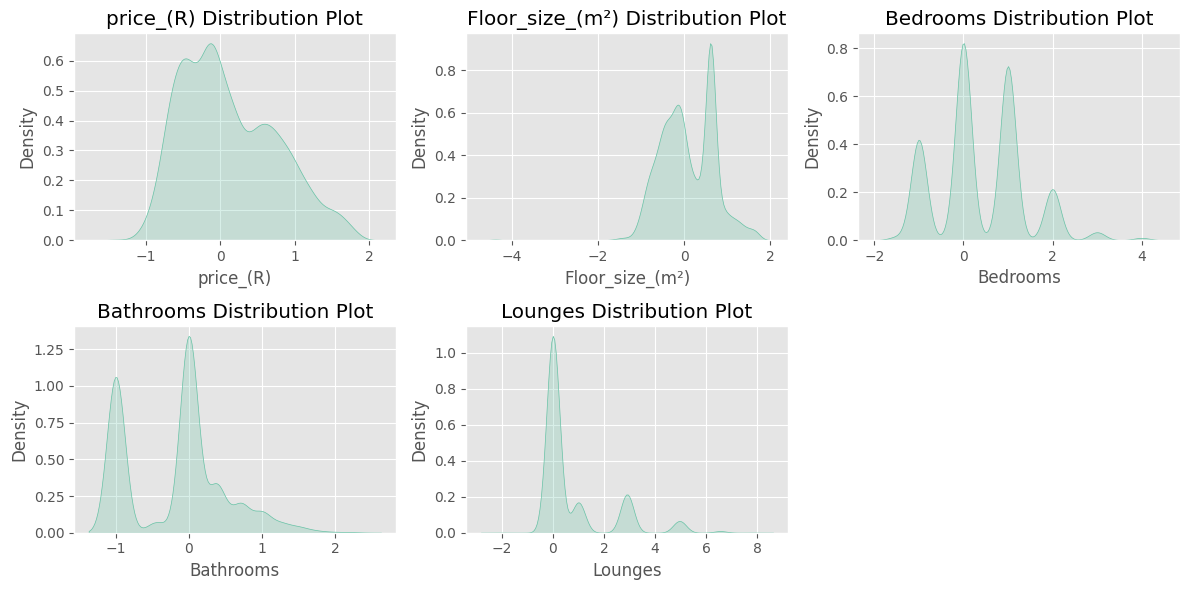

In [57]:
# Visualize the distribution of the scaled features and confirm that features have been transformed and scaled
plt.figure(figsize=(12, 6))

for i, feature in enumerate(scaled_df.iloc[:, 0:5].columns):
    plt.subplot(2, 3, 1+i)
    sns.kdeplot(scaled_df[feature], fill=True)
    plt.title(f'{feature} Distribution Plot')

plt.tight_layout()
plt.show()

### `PREPROCESSING SUMMARY`:

1. **Dataset Cleaning**
    - Converted each value in the property_details and property_features columns into list values. Proceeded to split each element in each list data point at the '\\n' character, and took the first element of the list as the key, and the second element as the value element. each dictionary represented a seperate value, and these dictionaries where appended into a single list in order to create dataframes for each feature. These dataframes were then concatenated to a copy of the original dataframe, where the property_details and property_features columns were dropped, creating a new dataframe with the same number of records as the original dataframe, but with the following features. `['suburb', 'propert_desc','address', 'price', 'image', 'Listing number', 'Property type', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies', 'Bedrooms', 'Bathrooms', 'Lounges', 'Open Parkings', 'Dining Areas', 'Garages', 'Storeys', 'En-suite', 'Covered Parkings']`. 

    - Dropped the following records `[2456, 2457, 2458, 2459, 2460, 2461, 2462, 2463, 2464, 4874, 5433]`. These records had either POA or Auction for price rather than the rand value. 

    - Reordered the feature order into `['suburb', 'propert_desc','address', 'price', 'Listing number', 'Property type', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies', 'Bedrooms', 'Bathrooms', 'Lounges', 'Open Parkings', 'Dining Areas', 'Garages', 'Storeys', 'En-suite', 'Covered Parkings', 'image']`.

    - Removed the measuring unit for the following features: `['price', 'Erf size', 'Floor size', 'Rates and taxes', 'Levies']`, and converted the features to float values.


2. **Duplicate Values**
    - Identified 4 duplicate values in the dataframe.
    
    - Dropped records with the following indexes: `1897, 2037, 4397, 4734`. 

3. **Null Values**
    - Identified a total of 34425 null values in the dataset

    - Removed the following features from the dataset as there were too many null values in the features: `['address', 'Erf size', 'Rates and taxes', 'Levies','Open Parkings', 'Dining Areas', 'Garages', 'Storeys', 'En-suite', 'Covered Parkings']`

    - There were 73 null records identified in the bedroom feature

    - Look at the records where the Bedroom feature had null values, and found that these records were land properties and not building properties, which would make sense for them not to have bedrooms, however, this will be a feature we look to be using in the training of our prediction model, so records with null values in the bedroom feature were removed. Index of the records removed: `[64,  409,  432, 1421, 1425, 1428, 1430, 1516, 1524, 1537, 1586, 1601, 1603, 1759, 1760, 1790, 1906, 1937, 2013, 2053, 2061, 2062, 2080, 2090,2108, 2111, 2143, 2147, 2151, 2152, 2166, 2168, 2181, 2461, 2487, 2489, 2534, 3161, 3251, 3263, 3353, 3424, 3521, 3527, 3529, 3530, 3532, 3533, 3544, 3545, 3548, 3568, 3639, 3640, 3641, 3648, 3661, 3662, 3663, 3664,
    3670, 3671, 3672, 3673, 3674, 3675, 3677, 3678, 3682, 4892, 4896, 4898, 5190, 5192]`

    - Convert Bedroom, Bathrooms, Lounges into integer values. 

    - Applied KNNImputer to impute the null values of Lounges and Floor size based on the values of the other features.

4. **Feature Selection**
    - Removed the Listing number and the image features as these were all unique values that would not add to the predictive model.     

    - Property_desc feature has also been dropped because the information stored in the feature values are dound as seperate features in the dataset. No other statistical significant information can be gathered through this feature. 

5. **One Hot Encoding**
    - Applied One Hot Encoding on the property type and the suburb feature

6. **Outlier Values**
    - Remove all the outliers from the features: price, floor size, bedrooms and bathrooms. 
    

## **Exploratory Data Analysis**
___

#### 1. **What are the most correlated features to price?**

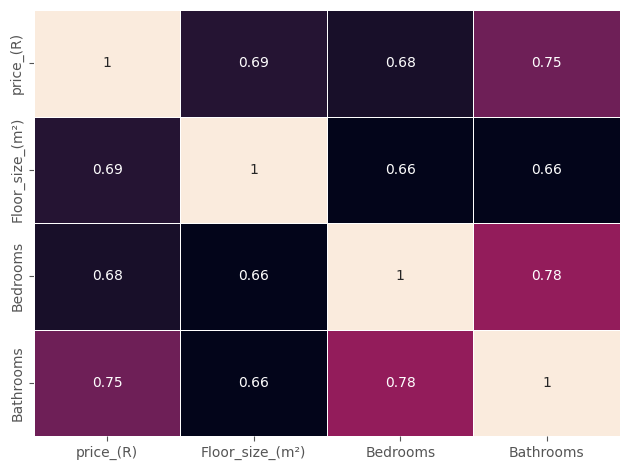

In [58]:
corr_matrix = scaled_df.corr()['price_(R)'][
    (scaled_df.corr()['price_(R)'] > 0.65) | (scaled_df.corr()['price_(R)'] < -0.65)
].index
test = scaled_df.loc[:, corr_matrix]
sns.heatmap(test.corr(), annot=True, linewidths=0.5, cbar=False)
plt.tight_layout()
plt.show()

#### 2. **How many properties from each suburb do we have?**

In [59]:
df8.head()

,suburb,price_(R),Property_type,Floor_size_(m²),Bedrooms,Bathrooms,Lounges
0,Rosebank and Parktown,1099000.0,Apartment,74.000000,2.0,1.0,1.0
1,Rosebank and Parktown,2175000.0,Flat,116.000000,2.0,1.0,1.0
2,Rosebank and Parktown,2950000.0,House,188.116914,3.0,3.0,1.0
3,Rosebank and Parktown,699000.0,Apartment,72.000000,2.0,2.0,1.3
4,Rosebank and Parktown,1511000.0,Apartment,36.000000,1.0,1.0,1.3


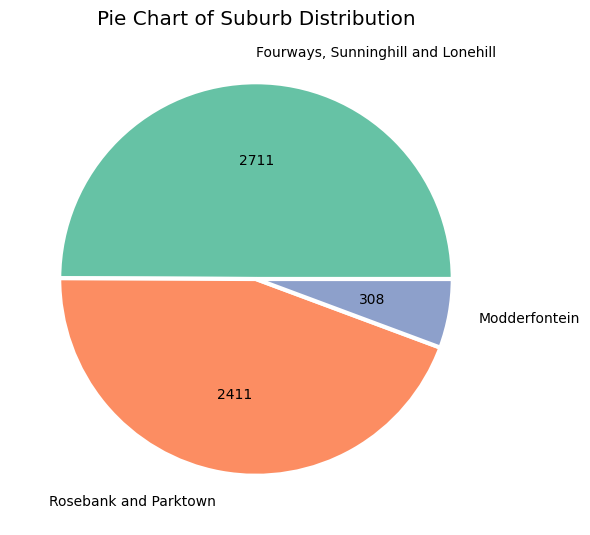

In [60]:
# Store the values and the suburb names
values = df8['suburb'].value_counts().values
names = df8['suburb'].value_counts().index

# Visualize the plot 
plt.figure(figsize=(6, 6))

plt.pie(values, 
        labels=names, 
        labeldistance=1.15, 
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        autopct=lambda p: f'{int(p * sum(values) / 100)}'
        )
plt.title('Pie Chart of Suburb Distribution')
plt.tight_layout()
plt.show()

#### 3. **Find the average price for property per suburb**

In [61]:
# Create a subset of the dataset.
suburb_price_df = df8.groupby('suburb')[['price_(R)']].mean().reset_index().sort_values(by='price_(R)')
suburb_price_df

,suburb,price_(R)
1,Modderfontein,1.471487e+06
0,"Fourways, Sunninghill and Lonehill",1.884716e+06
2,Rosebank and Parktown,3.610301e+06


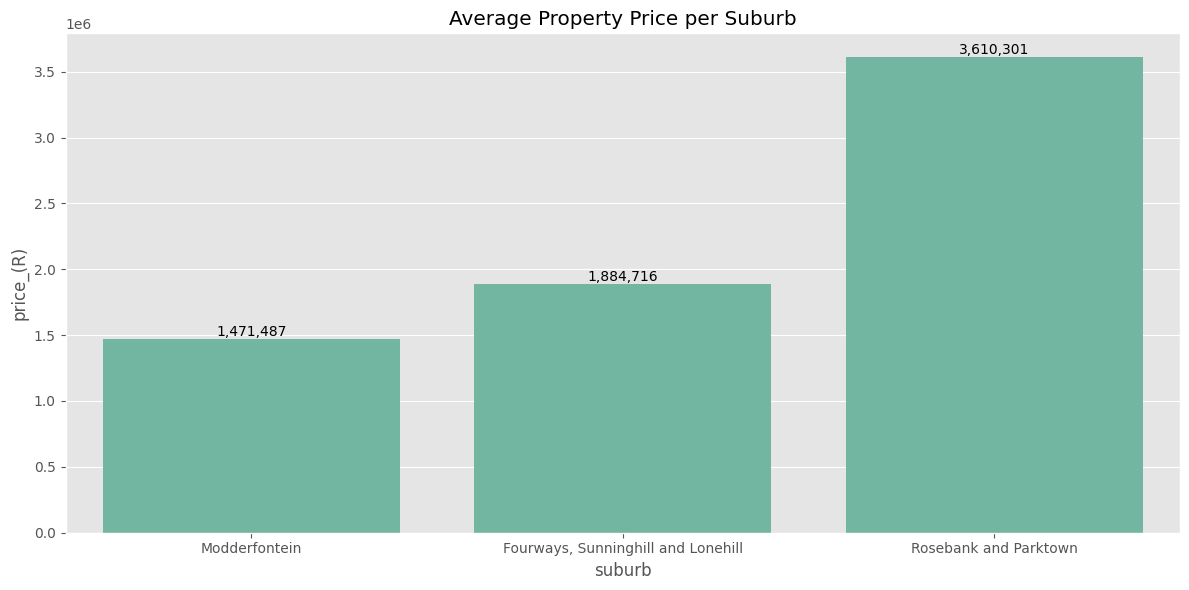

In [62]:
# Visualize the plot
plt.figure(figsize=(12, 6))

ax = sns.barplot(suburb_price_df, x='suburb', y='price_(R)')

# Formatting bar labels to show full values
for container in ax.containers:
    # f'{int(v):,}' will format the values with commas as thousands separators,
    # showing the full number without scientific notation.
    ax.bar_label(container, labels=[f'{int(v):,}' for v in container.datavalues], label_type='edge')

plt.title('Average Property Price per Suburb')
plt.tight_layout()
plt.show()

In [63]:
df8.head()

,suburb,price_(R),Property_type,Floor_size_(m²),Bedrooms,Bathrooms,Lounges
0,Rosebank and Parktown,1099000.0,Apartment,74.000000,2.0,1.0,1.0
1,Rosebank and Parktown,2175000.0,Flat,116.000000,2.0,1.0,1.0
2,Rosebank and Parktown,2950000.0,House,188.116914,3.0,3.0,1.0
3,Rosebank and Parktown,699000.0,Apartment,72.000000,2.0,2.0,1.3
4,Rosebank and Parktown,1511000.0,Apartment,36.000000,1.0,1.0,1.3


In [64]:
price_per_m2 = df8.loc[:, ['suburb', 'price_(R)', 'Floor_size_(m²)']]
price_per_m2['price_per_m2'] = round(price_per_m2['price_(R)'] / price_per_m2['Floor_size_(m²)'], 2)
price_per_m2

,suburb,price_(R),Floor_size_(m²),price_per_m2
0,Rosebank and Parktown,1099000.0,74.000000,14851.35
1,Rosebank and Parktown,2175000.0,116.000000,18750.00
2,Rosebank and Parktown,2950000.0,188.116914,15681.74
3,Rosebank and Parktown,699000.0,72.000000,9708.33
4,Rosebank and Parktown,1511000.0,36.000000,41972.22
...,...,...,...,...
5426,Modderfontein,1300000.0,103.000000,12621.36
5427,Modderfontein,1349900.0,101.000000,13365.35
5428,Modderfontein,1450000.0,75.000000,19333.33
5429,Modderfontein,1650000.0,104.000000,15865.38


In [69]:
price_per_m2_df = round(
    price_per_m2.groupby('suburb')[['price_per_m2']].mean(), 2
    ).reset_index().sort_values(by='price_per_m2')
price_per_m2_df

,suburb,price_per_m2
0,"Fourways, Sunninghill and Lonehill",16828.35
2,Rosebank and Parktown,19919.00
1,Modderfontein,23961.93


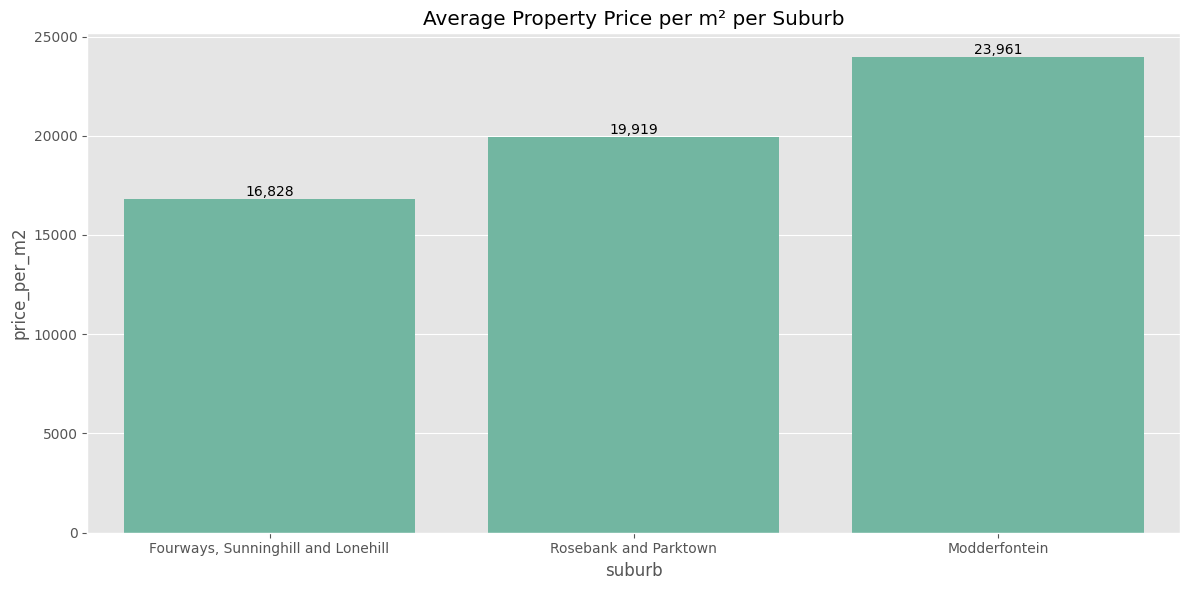

In [70]:
# Visualize the plot
plt.figure(figsize=(12, 6))

ax = sns.barplot(price_per_m2_df, x='suburb', y='price_per_m2')

# Formatting bar labels to show full values
for container in ax.containers:
    # f'{int(v):,}' will format the values with commas as thousands separators,
    # showing the full number without scientific notation.
    ax.bar_label(container, labels=[f'{int(v):,}' for v in container.datavalues], label_type='edge')

plt.title('Average Property Price per m² per Suburb')
plt.tight_layout()
plt.show()

#### 4. **Average Price per Property type**

In [67]:
# Create a subset of the dataset where the index is the property type and the values are the average prices 
prop_type_price_df = (
    df8.groupby('Property_type')[['price_(R)']].mean()
       .reset_index()
       .sort_values(by='price_(R)', ascending=False)
)

prop_type_price_df

,Property_type,price_(R)
9,Small Holding,1.600000e+07
7,Penthouse,9.698933e+06
2,Cluster,4.385518e+06
5,House,4.098705e+06
3,Duplex,1.900801e+06
11,Townhouse,1.871291e+06
8,Simplex,1.852231e+06
0,Apartment,1.701431e+06
4,Flat,1.197545e+06
6,Loft,1.068739e+06


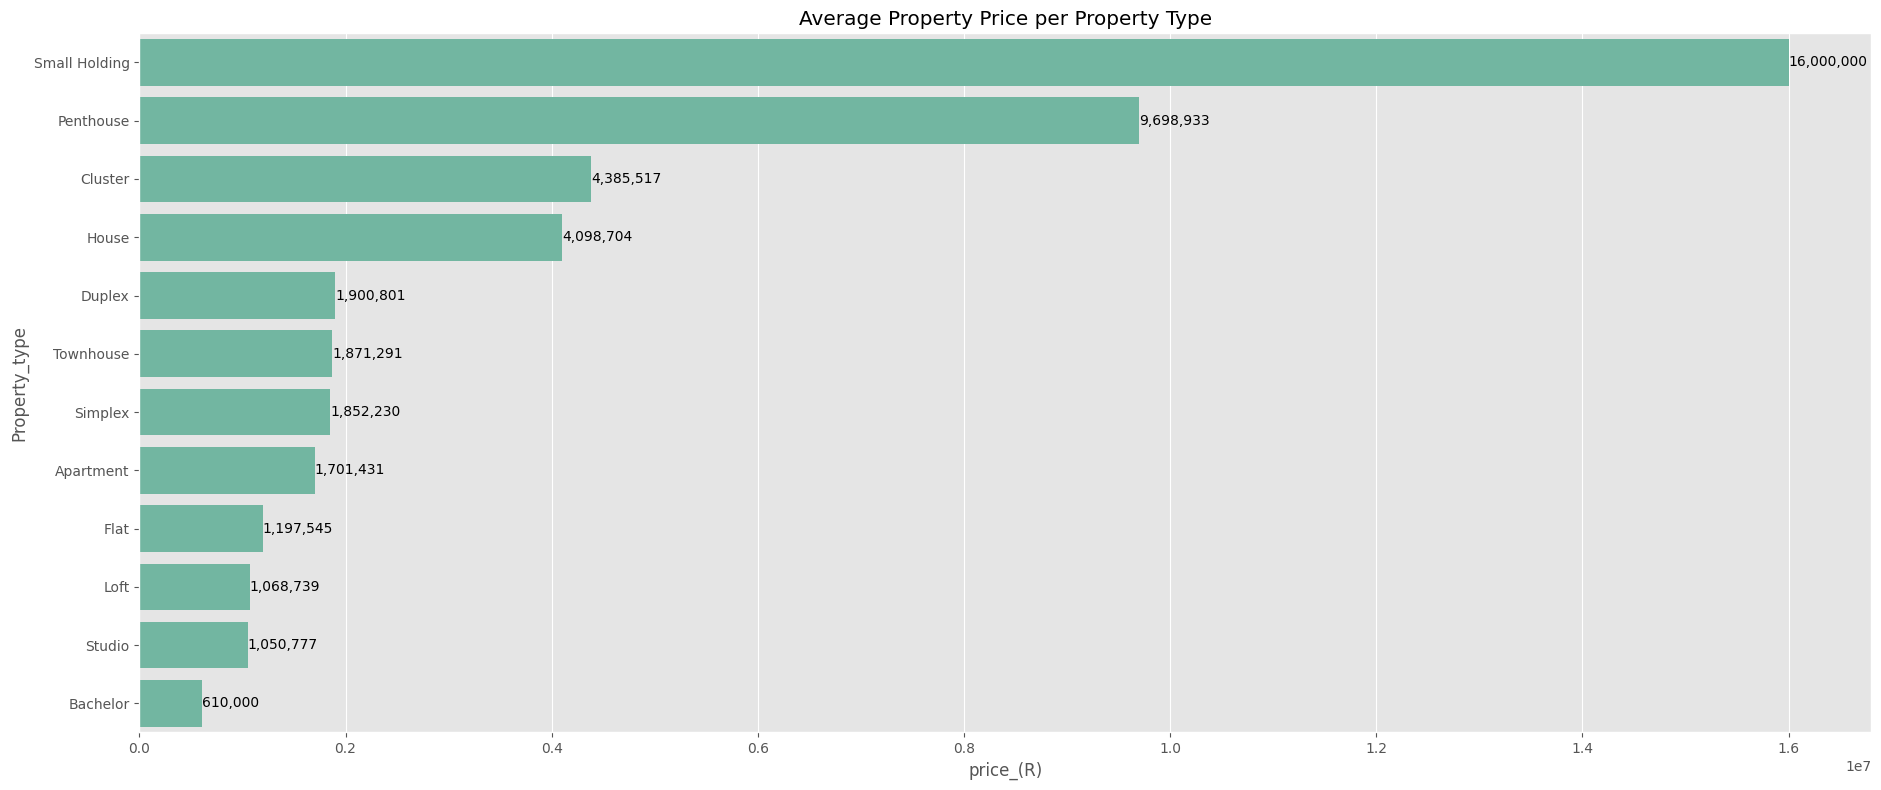

In [68]:
# Visualize the plot
plt.figure(figsize=(19, 8))

ax = sns.barplot(prop_type_price_df, x='price_(R)', y='Property_type')

# Formatting bar labels to show full values
for container in ax.containers:
    # f'{int(v):,}' will format the values with commas as thousands separators,
    # showing the full number without scientific notation.
    ax.bar_label(container, labels=[f'{int(v):,}' for v in container.datavalues], label_type='edge')

plt.title('Average Property Price per Property Type')
plt.tight_layout()
plt.show()

In [71]:
df8.head()

,suburb,price_(R),Property_type,Floor_size_(m²),Bedrooms,Bathrooms,Lounges
0,Rosebank and Parktown,1099000.0,Apartment,74.000000,2.0,1.0,1.0
1,Rosebank and Parktown,2175000.0,Flat,116.000000,2.0,1.0,1.0
2,Rosebank and Parktown,2950000.0,House,188.116914,3.0,3.0,1.0
3,Rosebank and Parktown,699000.0,Apartment,72.000000,2.0,2.0,1.3
4,Rosebank and Parktown,1511000.0,Apartment,36.000000,1.0,1.0,1.3


In [76]:
suburb_prop_type_pivot = pd.crosstab(index=df8['suburb'], columns=df8['Property_type']).reset_index()
suburb_prop_type_pivot

Property_type,suburb,Apartment,Bachelor,Cluster,Duplex,Flat,House,Loft,Penthouse,Simplex,Small Holding,Studio,Townhouse
0,"Fourways, Sunninghill and Lonehill",1496,2,52,27,16,853,19,6,19,1,13,208
1,Modderfontein,215,0,2,0,6,35,0,0,2,0,0,48
2,Rosebank and Parktown,1197,0,58,14,11,968,4,24,5,0,14,116


Index(['Apartment', 'Bachelor', 'Cluster', 'Duplex', 'Flat', 'House', 'Loft',
       'Penthouse', 'Simplex', 'Small Holding', 'Studio', 'Townhouse'],
      dtype='object', name='Property_type')

In [86]:
cols = suburb_prop_type_pivot.drop(columns=['suburb']).columns

suburb_prop_type_melt_df = suburb_prop_type_pivot.melt(
    id_vars='suburb',
    value_vars=cols,
    var_name='Property Type',
    value_name='Count'
).sort_values(by='Count', ascending=False)
suburb_prop_type_melt_df

,suburb,Property Type,Count
0,"Fourways, Sunninghill and Lonehill",Apartment,1496
2,Rosebank and Parktown,Apartment,1197
17,Rosebank and Parktown,House,968
15,"Fourways, Sunninghill and Lonehill",House,853
1,Modderfontein,Apartment,215
33,"Fourways, Sunninghill and Lonehill",Townhouse,208
35,Rosebank and Parktown,Townhouse,116
8,Rosebank and Parktown,Cluster,58
6,"Fourways, Sunninghill and Lonehill",Cluster,52
34,Modderfontein,Townhouse,48


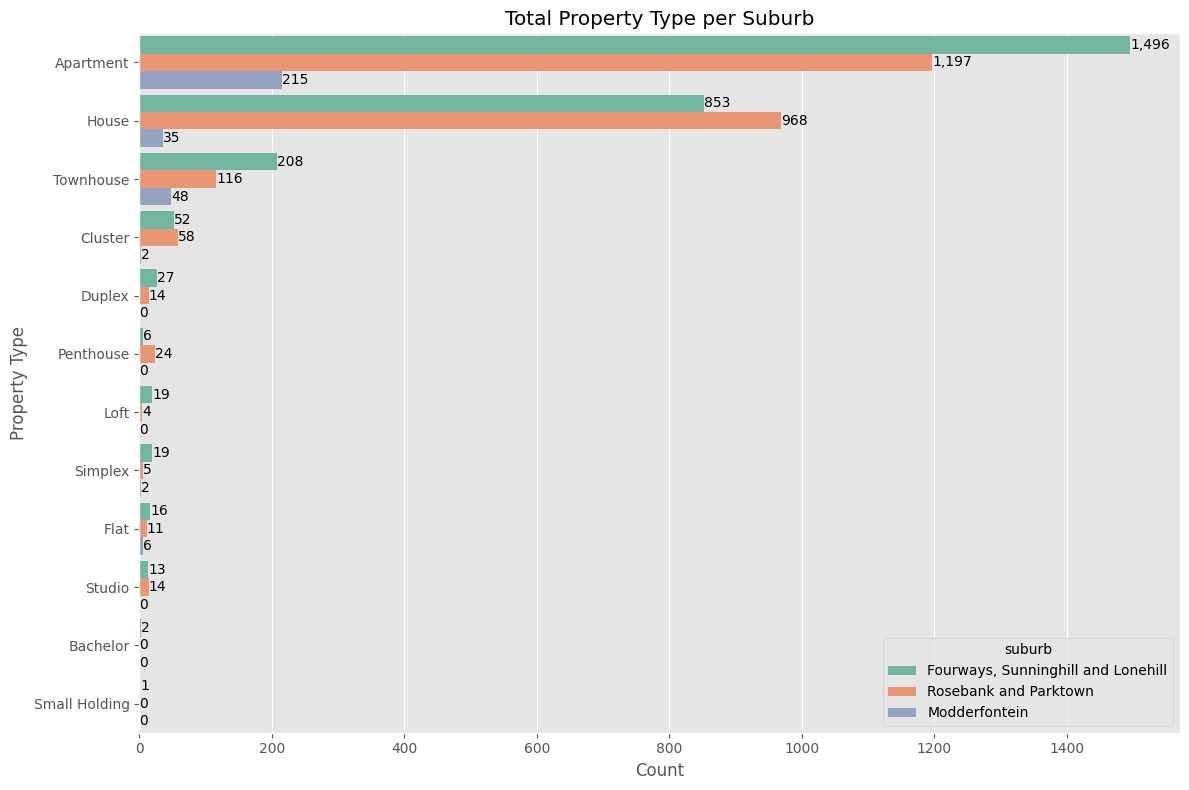

In [92]:
# Visualize the plot
plt.figure(figsize=(12, 8))

ax = sns.barplot(suburb_prop_type_melt_df, x='Count', y='Property Type', hue='suburb', width=0.9)

# Formatting bar labels to show full values
for container in ax.containers:
    # f'{int(v):,}' will format the values with commas as thousands separators,
    # showing the full number without scientific notation.
    ax.bar_label(container, labels=[f'{int(v):,}' for v in container.datavalues], label_type='edge')

plt.title('Total Property Type per Suburb')
plt.tight_layout()
plt.show()

In [105]:
median_size_df = df8.groupby(['Property_type', 'suburb'])[['Floor_size_(m²)']].median().reset_index().sort_values(by='Floor_size_(m²)', ascending=False)
median_size_df

,Property_type,suburb,Floor_size_(m²)
18,Penthouse,Rosebank and Parktown,232.500000
4,Cluster,"Fourways, Sunninghill and Lonehill",230.500000
6,Cluster,Rosebank and Parktown,189.058457
12,House,"Fourways, Sunninghill and Lonehill",188.116914
13,House,Modderfontein,188.116914
14,House,Rosebank and Parktown,188.116914
22,Small Holding,"Fourways, Sunninghill and Lonehill",188.116914
27,Townhouse,Rosebank and Parktown,188.116914
20,Simplex,Modderfontein,156.000000
11,Flat,Rosebank and Parktown,149.000000


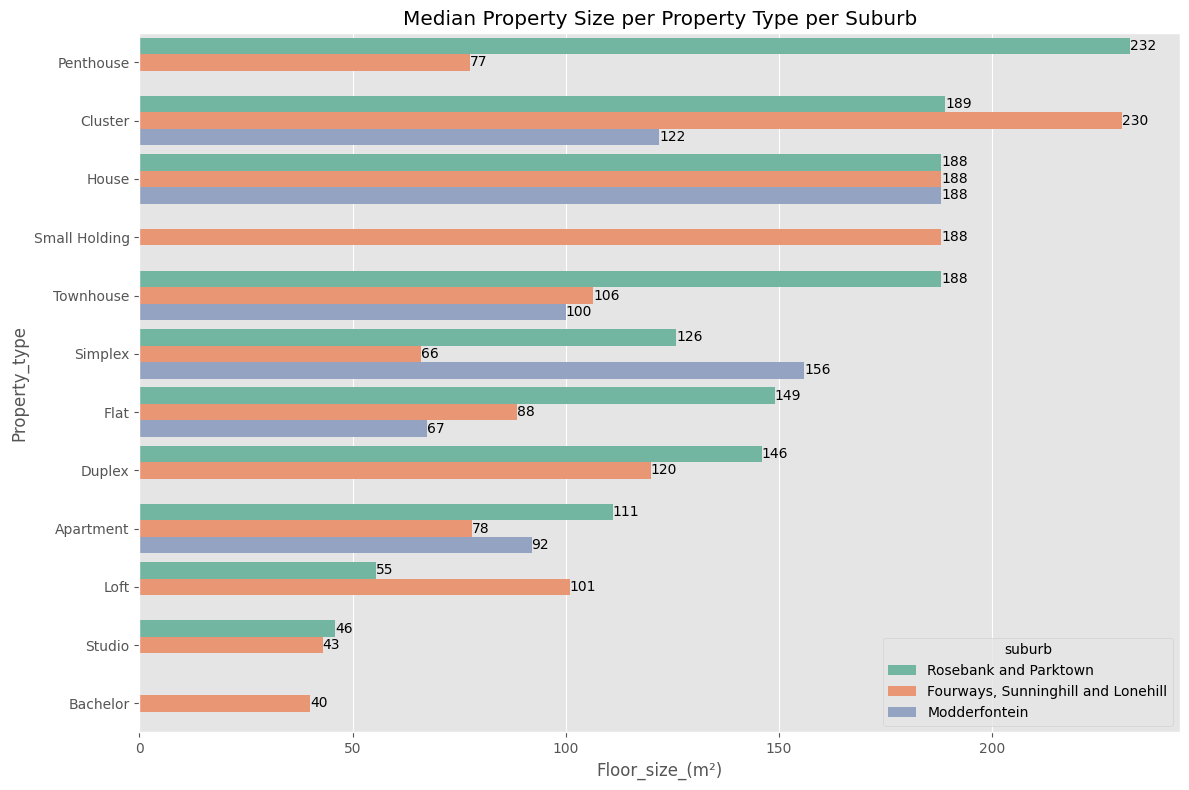

In [109]:
# Visualize the plot
plt.figure(figsize=(12, 8))

ax = sns.barplot(median_size_df, x='Floor_size_(m²)', y='Property_type', hue='suburb', width=0.85)

# Formatting bar labels to show full values
for container in ax.containers:
    # f'{int(v):,}' will format the values with commas as thousands separators,
    # showing the full number without scientific notation.
    ax.bar_label(container, labels=[f'{int(v):,}' for v in container.datavalues], label_type='edge')

plt.title('Median Property Size per Property Type per Suburb')
plt.tight_layout()
plt.show()